# The Solow Model

This project will solve The Solow Model which explains long-run economic growth. First the basic Solow model for a closed economy is analyzed and the it is extended by...  
The equations of the Solow model without any extensions are as follows:

**The Basic Solow Model**  
1. $ Y_t = BK^\alpha_tL_t^{1-\alpha}, \quad 0<\alpha<1 $

2. $ r_t = \alpha B \dfrac{K_t}{L_t}^{\alpha-1} $

3. $ w_t = (1-\alpha)B \dfrac{K_t}{L_t}^\alpha $

4. $ K_{t+1} = (1-\delta)K_t+S_t, \quad 0<\delta<1 \; and \; K_0 \; \text{is given} $

5. $ S_t = sY_t, \quad 0<s<1 $

6. $ L_{t+1} = (1+n)L_t, \quad L_0 \text{ given} $

Equation 1. is a Cobb-Douglas production function where $K_t$ is capital, $L_t$ is labor and $B$ is the total factor productivity.  
Equation 2. is the factor price of capital 
Equation 3. is the factor price of labor
Equation 4. describes how the capital is accumulated from period $t$ to $t+1$.  
Equation 5. describes the savings in the economy. Each household saves a fraction $s$ out of the income.  
Equation 6. describes the labor force growth from period $t$ to $t+1$ where $n$ is the population growht.


**The Transition Equation**  
The transition equation for $k_t$ is

$ k_{t+1} = \dfrac{1}{1+n} (sBk_t^\alpha + (1-\delta)k_t) $  

by subtracting $k_t$ on both sides we get the Solow equation  
$ k_{t+1} - k_t = \dfrac{1}{1+n} (sBk_t^\alpha - (n+g)k_t) $  

**Steady State**  
Plugging in $k^*=k_t=k_{t+1}$ and isolating $k^*$ we get the equation for the capital steady state  
$ k^* = B^{\frac{1}{1-\alpha}} \left( \dfrac{s}{n+\delta} \right)^{\frac{1}{1-\alpha}} $  

Plugging $k^*$ into the BNP per capita equation, $y_t =Bk_t^\alpha$, we get the steady state for BNP/capita  
$ y^* = B^{\frac{1}{1-\alpha}} \left( \dfrac{s}{n+\delta} \right)^{\frac{\alpha}{1-\alpha}} $  




### **Importing needed packages**

In [1]:
import numpy as np
import pandas as pd
import sympy as sm
import matplotlib.pyplot as plt
from scipy import linalg
from scipy import optimize
sm.init_printing(use_unicode=True) #for pretty printing

**Defining symbols**

In [2]:
kt1 = sm.symbols('k_{t+1}')
n = sm.symbols('n')
s = sm.symbols('s')
B = sm.symbols('B')
kt = sm.symbols('k_t')
alpha = sm.symbols('alpha')
delta = sm.symbols('delta')
L0 = sm.symbols('L_0')
K0 = sm.symbols('K_0')
yt = sm.symbols('y_t')

**Defining equations**

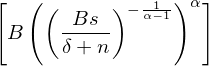

In [3]:
# Transition Equation
treq = sm.Eq((1/(1+n)*(s*B*kt**alpha+(1-delta)*kt)),kt1)
sole = sm.Eq((1/(1+n)*(s*B*kt**alpha-(n+delta)*kt)))
#ssk = sm.Eq(B**(1/(1-alpha))*(s/(n+delta))**(1/(1-alpha)),kt)
#ssy = sm.Eq(B**(1/(1-alpha))*(s/(n+delta))**(alpha/(1-alpha)),yt)

k = sm.solve(sole,kt)[0]
k

cdp = sm.Eq(B*k**alpha,yt)
y = sm.solve(cdp,yt)
cdp
y


**Defining parameters**

In [4]:
# Getting solution for values 
ssk_sol = sm.lambdify((alpha,delta,s,B,n),k)
ssy_sol = sm.lambdify((alpha,delta,s,B,n),y)

alpha = 1/3
delta = 0.05
s = 0.101
B = 1
n = 0.025

ssk_val = ssk_sol(alpha,delta,s,B,n) 
ssk_val
ssy_val = ssy_sol(alpha,delta,s,B,n) 

print(f'The steady state capital is {ssk_val:.3f} and the steady state value of GDP per capita is')
print(ssy_val)



The steady state capital is 1.563 and the steady state value of GDP per capita is
[1.1604596790352806]
